# Case Study - Alanine Dipeptide

** Info about the data **

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook

import nglview

## Molecular Visualization using nglview

In [2]:
view = nglview.show_file("ini0.pdb")
view

NGLWidget()

In [3]:
view = nglview.show_file("ini0.pdb")
view.add_label(label_type="element", color="black")
view

NGLWidget()

## Plotting the Potential Energy Surface

In [4]:
# Set font size
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

In [5]:
df = pd.read_csv("a1a2ene.csv")

In [6]:
df.head()

,phi,psi,energy
0,-180,-180,-0.120177
1,-180,-160,-0.118642
2,-180,-140,-0.116515
3,-180,-120,-0.115398
4,-180,-100,-0.115198


In [7]:
# Need to prepare data for plotting.
x = df["phi"].unique()
y = df["psi"].unique()
z = df["energy"].values.reshape(19, -1, order="F")

# Get the min and max energy values
pmin = z.min()
pmax = z.max()

<IPython.core.display.Javascript object>


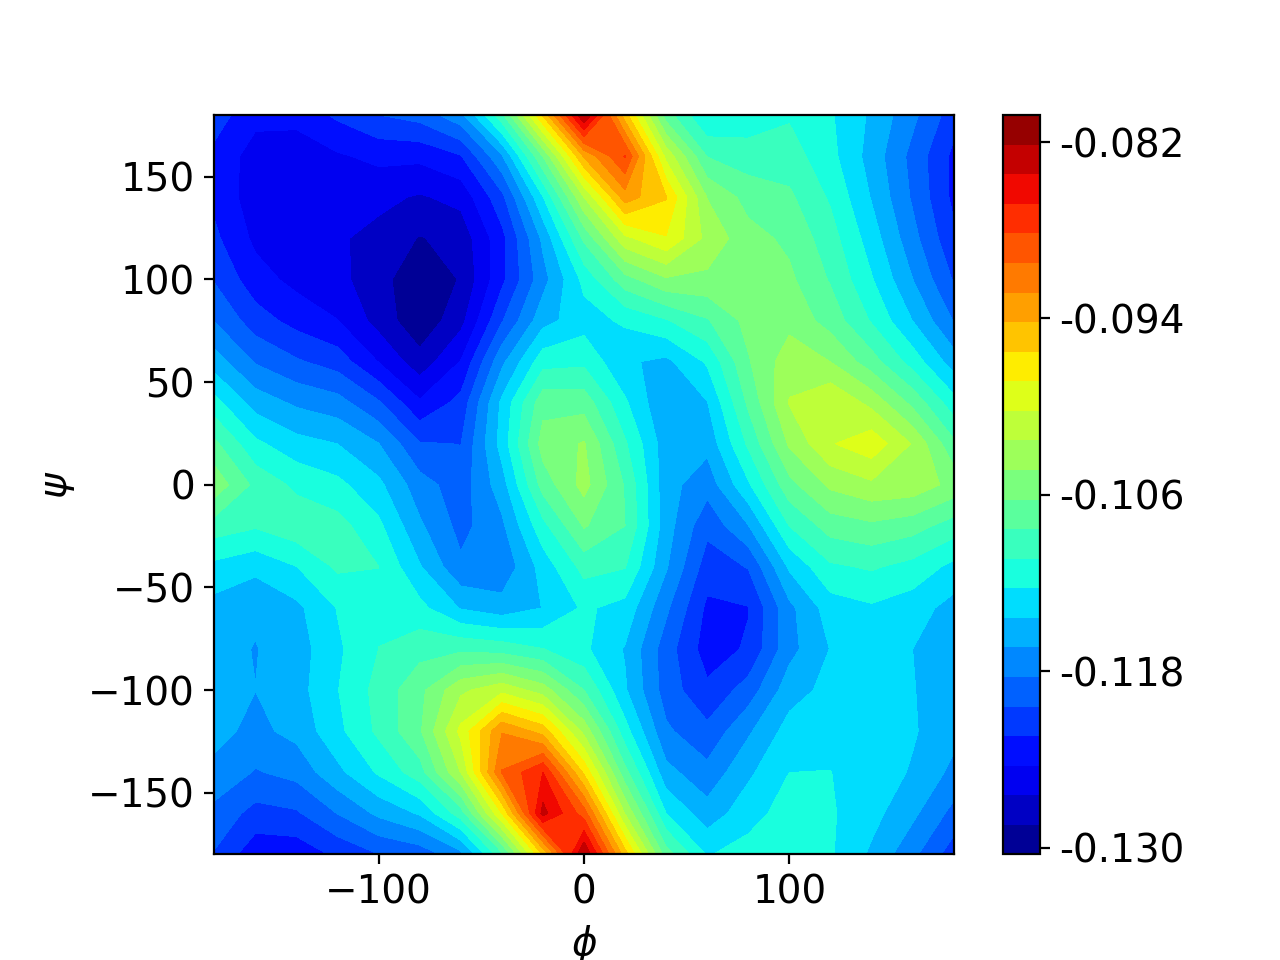

In [8]:
fig, ax = plt.subplots()

ticks = np.linspace(pmin, pmax, 5)

CS = ax.contourf(x, y, z, cmap="jet", levels=30)
#ax.contour(x_,y_, values_square, colors='white')
ax.set_aspect('equal')
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\psi$')


fig.colorbar(CS, format="%.3f", ticks=ticks)

## Low and High Energy

In [9]:

import matplotlib.image as mpimg
import nglview

min_loc = np.argwhere(z == np.min(z))
max_loc = np.argwhere(z == np.max(z))

print(max_loc)
print(min_loc)

[[0 9]]
[[14  5]]


In [10]:
max_view = nglview.show_file("pdb/opt.0.9.pdb")
max_view

NGLWidget()

In [11]:
min_view = nglview.show_file("pdb/opt.14.5.pdb")
min_view

NGLWidget()

In [20]:
min_v = min_view.render_image()

In [21]:
with open('low_energy.png', 'wb') as t:
    t.write(min_v.value)

In [22]:
max_v = max_view.render_image()

In [23]:
max_v

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0fe\x00\x00\x04\xb0\x08\x06\x00\x00\x00q8p\x86\x00\…

In [24]:
with open('high_energy.png', 'wb') as t:
    t.write(max_v.value)

In [25]:
im = mpimg.imread("low_energy.png")
crop = im[:1200, 1500:2500 , :4]

im2 = mpimg.imread("high_energy.png")
crop2 = im2[:1200, 1500:2500 , :4]

<IPython.core.display.Javascript object>


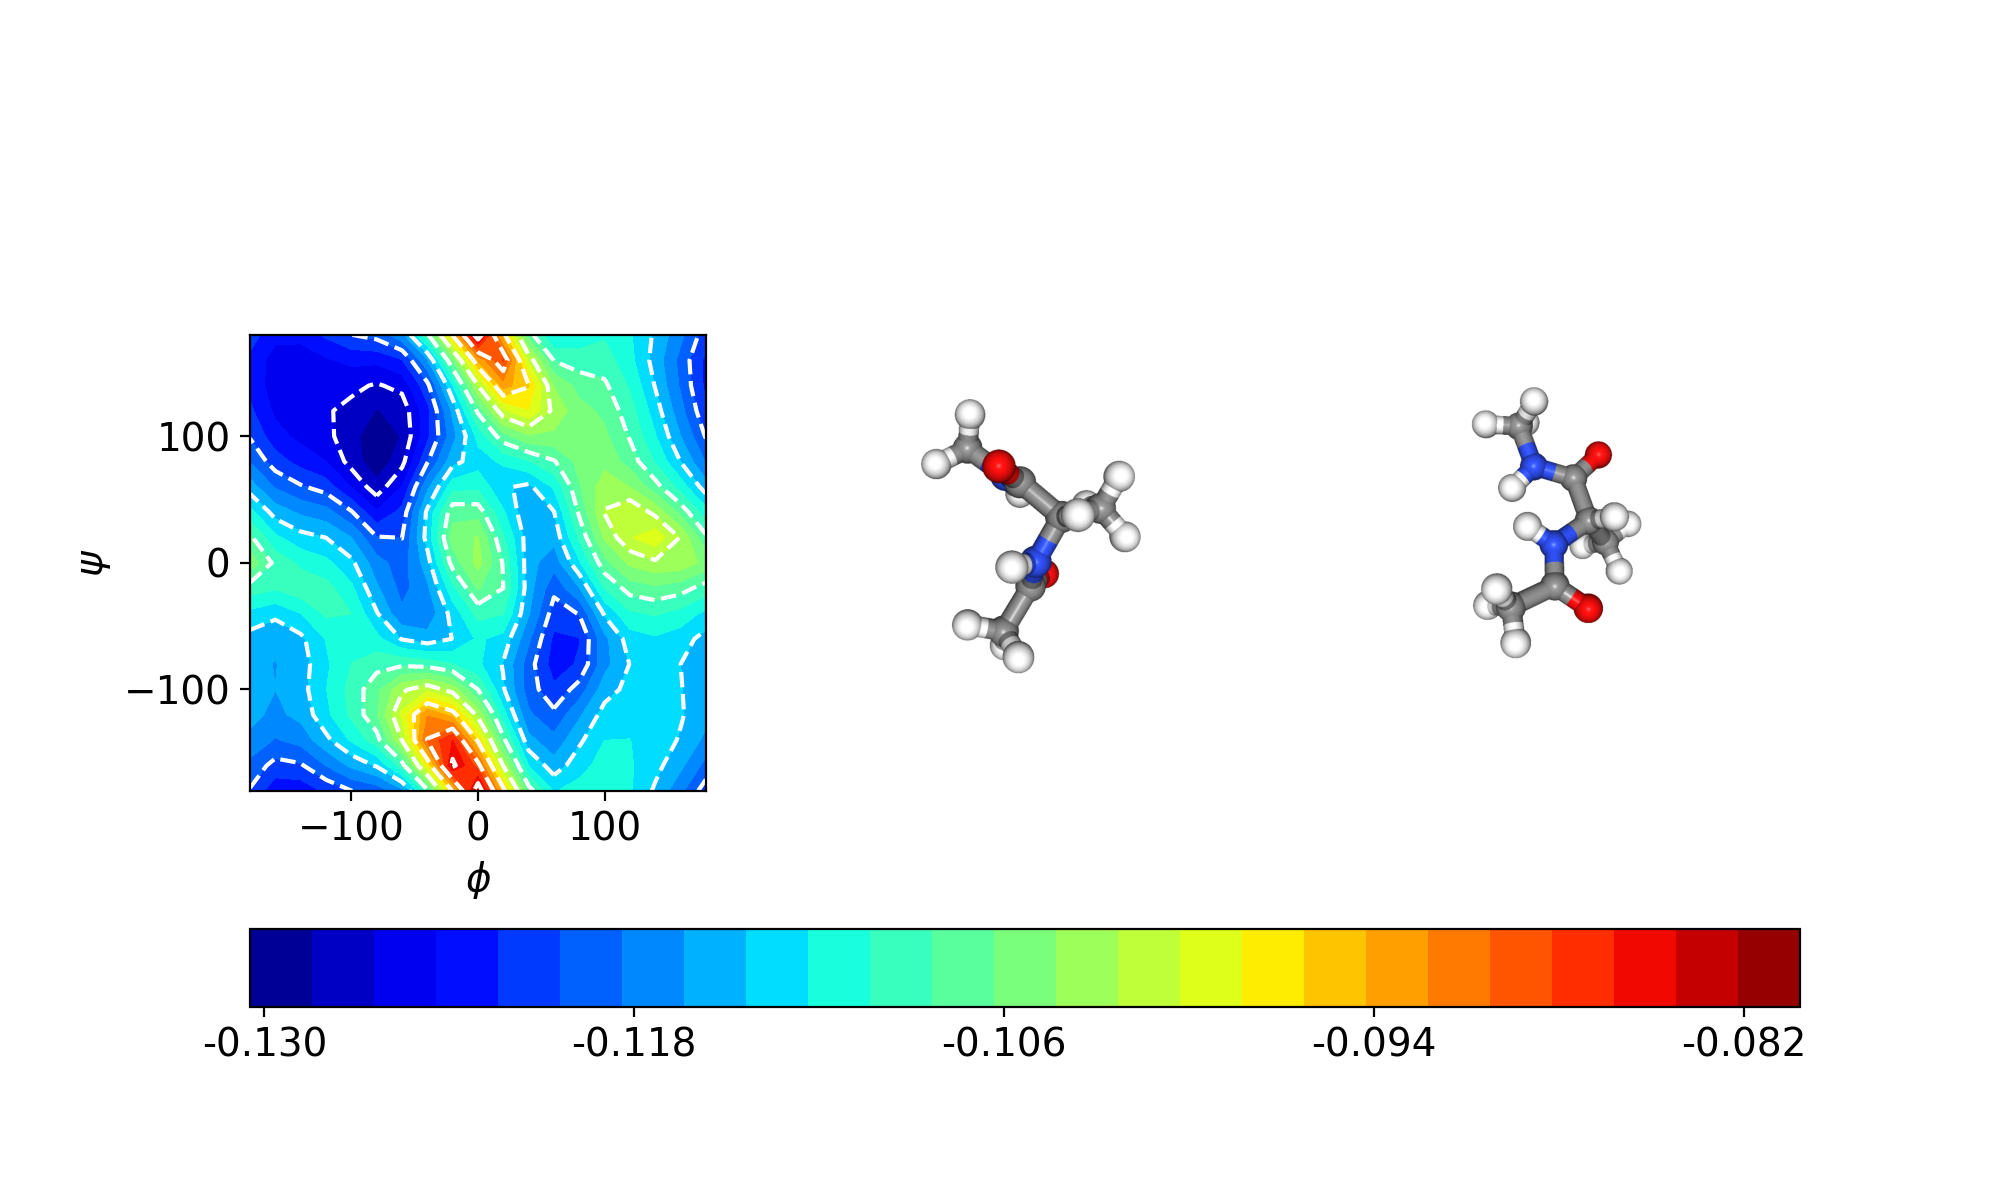

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(10,6))

ticks = np.linspace(pmin, pmax, 5)

CS = ax[0].contourf(x, y, z, cmap="jet", levels=30)
ax[0].contour(x,y, z, colors='white')
ax[0].set_aspect('equal')
ax[0].set_xlabel(r'$\phi$')
ax[0].set_ylabel(r'$\psi$')

ax[1].imshow(crop)
ax[1].axis("off")

ax[2].imshow(crop2)
ax[2].axis("off")

fig.colorbar(CS, format="%.3f", ticks=ticks, location="bottom", ax=ax[:])